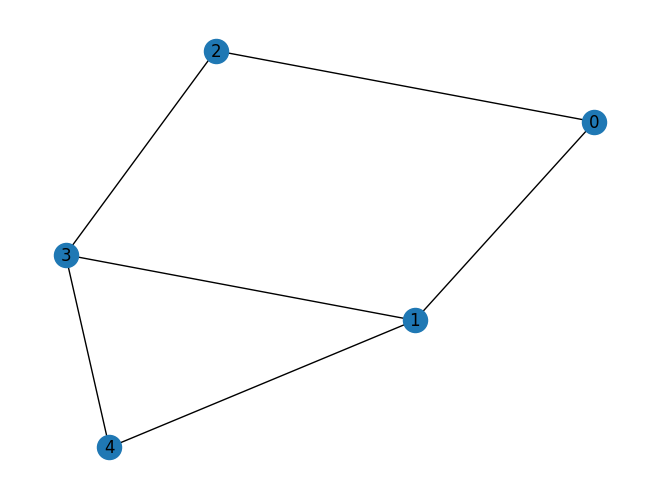

In [10]:
import pgmpy
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.models import MarkovModel, MarkovNetwork
import networkx as nx
import matplotlib.pyplot as plt

edges = [[0, 1], [0, 2], [1, 3], [1, 4], [2, 3], [3, 4]]

model = MarkovNetwork()

model.add_nodes_from([i for i in range(5)])
model.add_edges_from(edges)

G = nx.Graph()
G.add_nodes_from(model.nodes())
G.add_edges_from(model.edges())
nx.draw(G, with_labels=True)

In [11]:
import numpy as np

def create_potential(i, j):
    values = np.exp([[i * 0 + j * 0, i * 0 + j * 1],
                     [i * 1 + j * 0, i * 1 + j * 1]])
    return DiscreteFactor(variables=[i, j], cardinality=[2, 2], values=values)

factors = []
for edge in edges:
    i, j = edge
    factors.append(create_potential(i, j))
    
model.add_factors(*factors)